## A Test for Comparing Discrete Distributions

I found [Sal Khan's explanation](https://www.youtube.com/watch?v=2QeDRsxSF9M) to be as straight-forward as it was useful.

Essentially, the Chi-Squared test is used when: 

- You've got `k` discrete classes
- Some idea of their distribution
- A number of observed values that fall into said classes

In the case of the video, we want to check if a shop owner's approximation of visitors-by-day as a percentage of their week is accurate or not.

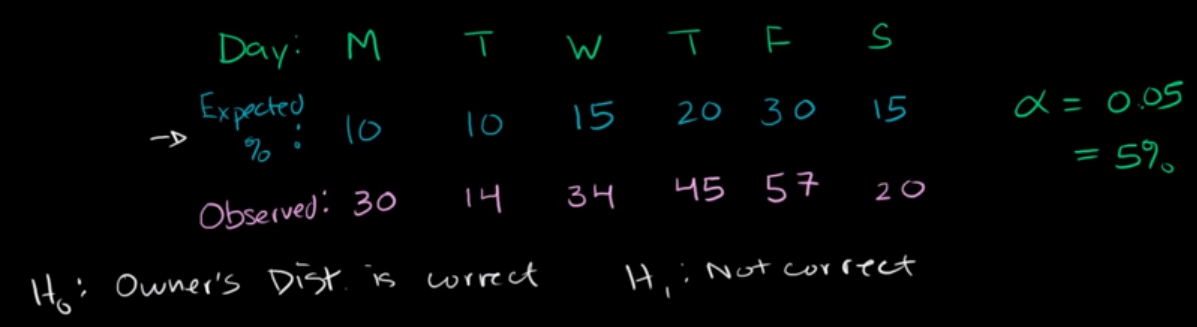

In [1]:
from IPython.display import Image
Image('../images/chi_sq_ex.png')

To solve a problem like this, we first want to rescale the total count of observed visitors (`200`) in a given week by the `expected %` value above, giving 

`20 20 30 40 60 30`

Then, similar to how we might investigate a single normal distribution for each of these, we want to find the squared distance from observation to expected, normalized by expected.

The sum of these make up our Chi-Squared distribution, where our degrees of freedom is equal to the number of classes, minus 1-- so `5`.

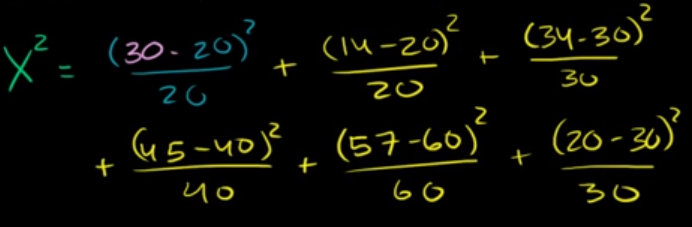

In [2]:
Image('../images/chi_sq_ex2.png')

Then, like any other test, we calculate the statistic and let a computer tell us how that translates into a p-value.

## The Distribution Itself

Borrowing [jbstatistics](https://www.youtube.com/watch?v=hcDb12fsbBU)' explanation:

- If `Z` is standard normal, then `Z-squared` has a `Chi-squared` distribution, with one degree of freedom
- If `Z1, ..., Zk` are independent standard normals, then `Z1^2 + ... + Zk^2` has a `Chi-squared` distribution with `k` degrees of freedom

These distributions take on different shapes, depending on how many `Z` terms you mix in (and by extension value of `k`).

Per wikipedia:

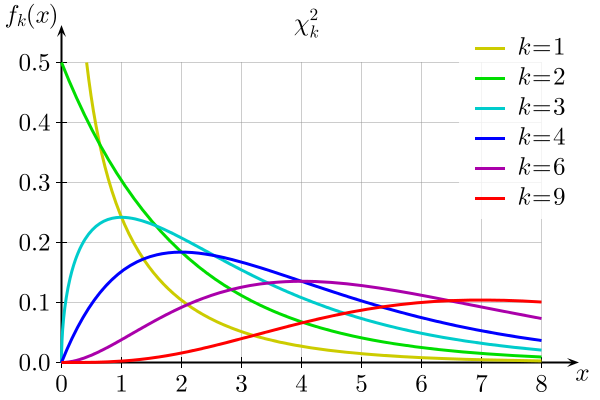

In [3]:
Image('../images/chi_sq_dist.png')

**Note**: Each curve has:

- Mean: degrees of freedom
- Variance: degrees of freedom, squared
- Mode: degrees of freedom - 2

## Chi-Squared Tests in Python

Rehashing Sal's example above, we'll start with an array of the expected proportions, which sum to 1

In [4]:
import numpy as np

exp_prop = np.array([.10, .10, .16, .20, .30, .15])

Then we'll create an array of our observed values

In [5]:
y_obs = np.array([30, 14, 34, 45, 57, 20])

Then, we'll create an array, `y_exp`, that gives us the class count we'd expect to see, given the total count of observed people

In [6]:
y_exp = y_obs.sum() * exp_prop

Finally, performing the test is as easy as invoking a clean `scipy.stats` function

In [7]:
from scipy.stats import chisquare

chisquare(f_obs=y_obs, f_exp=y_exp)

Power_divergenceResult(statistic=11.033333333333333, pvalue=0.05072307251654765)